In [1]:
import fnmatch
import os

import numpy as np
from skimage.feature import register_translation
import cv2
from PIL import Image

from ipywidgets import FloatProgress
from IPython.display import display

# Crop Images

In [31]:
# set new image dimensions
w = 312
h = 312

In [62]:
# set initial x and y values: must recalibrate for each new position
x_1 = 73
y_1 = 116

# position to process
pos = '12'

# get files containing string
C1_files = []
regex = '*XY%sC1*' % pos
for file in sorted(os.listdir('tif')):
    if fnmatch.fnmatch(file, regex):
        C1_files.append(file)

C2_files = []
regex = '*XY%sC2*' % pos
for file in sorted(os.listdir('tif')):
    if fnmatch.fnmatch(file, regex):
        C2_files.append(file)
            
# first image
curr_imC1 = cv2.imread('tif/'+C1_files[0])
im_croppedC1 = curr_imC1[y_1:y_1+h, x_1:x_1+w]
im_croppedC1 = Image.fromarray(im_croppedC1)
im_croppedC1.save('tif-cropped/'+C1_files[0])

curr_imC2 = cv2.imread('tif/'+C2_files[0])
im_croppedC2 = curr_imC2[y_1:y_1+h, x_1:x_1+w]
im_croppedC2 = Image.fromarray(im_croppedC2)
im_croppedC2.save('tif-cropped/'+C2_files[0])

# median pixels
med_pixelC1 = curr_imC1[50, 50]
med_pixelC2 = curr_imC2[50, 50]

f = FloatProgress(min=0, max=len(C1_files), description='Processing:')
display(f)

# iterative image registration
for n in range(1, len(C1_files)):
    prev_imC1 = curr_imC1
    curr_imC1 = cv2.imread('tif/'+C1_files[n])
    curr_imC2 = cv2.imread('tif/'+C2_files[n])
    shift, error, diffphase = register_translation(prev_imC1, curr_imC1)
    y_1 = (int) (y_1-shift[0])
    x_1 = (int) (x_1-shift[1])
    im_croppedC1 = curr_imC1[y_1:y_1+h, x_1:x_1+w]  
    im_croppedC2 = curr_imC2[y_1:y_1+h, x_1:x_1+w]

    if len(im_croppedC1) < h:
        rows = h - len(im_croppedC1)
        filler = np.full((rows, len(im_croppedC1[0]), 3), med_pixelC1)
        im_croppedC1 = np.concatenate((im_croppedC1, filler), axis=0)
        filler = np.full((rows, len(im_croppedC1[0]), 3), med_pixelC2) # find more efficient way
        im_croppedC2 = np.concatenate((im_croppedC2, filler), axis=0)

    if len(im_croppedC1[0]) < w:
        cols = w - len(im_croppedC1[0])
        filler = np.full((h, cols, 3), med_pixelC1)
        im_croppedC1 = np.concatenate((im_croppedC1, filler), axis=1)
        filler = np.full((h, cols, 3), med_pixelC2)
        im_croppedC2 = np.concatenate((im_croppedC2, filler), axis=1)

    Image.fromarray(im_croppedC1).save('tif-cropped/'+C1_files[n])
    Image.fromarray(im_croppedC2).save('tif-cropped/'+C2_files[n])
    f.value += 1

f.close()
print('Done processing!')

FloatProgress(value=0.0, description='Processing:', max=241.0)

Done processing!


# Testing stuff (ignore):

In [40]:
for file in sorted(os.listdir('tif')):
    if fnmatch.fnmatch(file, '*XY01C1*'):
        print(file)

whi5-myo1-20120608T001XY01C1.tif
whi5-myo1-20120608T002XY01C1.tif
whi5-myo1-20120608T003XY01C1.tif
whi5-myo1-20120608T004XY01C1.tif
whi5-myo1-20120608T005XY01C1.tif
whi5-myo1-20120608T006XY01C1.tif
whi5-myo1-20120608T007XY01C1.tif
whi5-myo1-20120608T008XY01C1.tif
whi5-myo1-20120608T009XY01C1.tif
whi5-myo1-20120608T010XY01C1.tif
whi5-myo1-20120608T011XY01C1.tif
whi5-myo1-20120608T012XY01C1.tif
whi5-myo1-20120608T013XY01C1.tif
whi5-myo1-20120608T014XY01C1.tif
whi5-myo1-20120608T015XY01C1.tif
whi5-myo1-20120608T016XY01C1.tif
whi5-myo1-20120608T017XY01C1.tif
whi5-myo1-20120608T018XY01C1.tif
whi5-myo1-20120608T019XY01C1.tif
whi5-myo1-20120608T020XY01C1.tif
whi5-myo1-20120608T021XY01C1.tif
whi5-myo1-20120608T022XY01C1.tif
whi5-myo1-20120608T023XY01C1.tif
whi5-myo1-20120608T024XY01C1.tif
whi5-myo1-20120608T025XY01C1.tif
whi5-myo1-20120608T026XY01C1.tif
whi5-myo1-20120608T027XY01C1.tif
whi5-myo1-20120608T028XY01C1.tif
whi5-myo1-20120608T029XY01C1.tif
whi5-myo1-20120608T030XY01C1.tif
whi5-myo1-

In [7]:
file1 = 'whi5-myo1-20120608T001XY01C1.tif'
file2 = 'whi5-myo1-20120608T002XY01C1.tif'

im1 = cv2.imread('tif/'+file1)
im2 = cv2.imread('tif/'+file2)

In [10]:
shift, error, diffphase = register_translation(im1, im2)

In [11]:
shift

array([-11.,  -5.,   0.])

In [33]:
y = 96
h = 312

x = 112
w = 312
im1_cropped = im1[y:y+h, x:x+w]

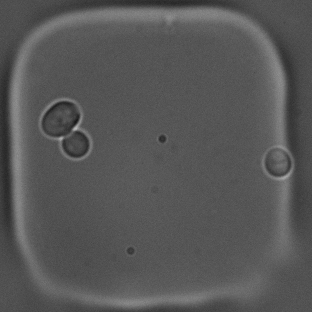

In [15]:
Image.fromarray(im1_cropped, 'RGB')

In [34]:
y = (int) (y-shift[0])
x = (int) (x-shift[1])

In [35]:
im2_cropped = im2[y:y+h, x:x+w]

In [121]:
im2_cropped

array([[[75, 75, 75],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [80, 80, 80]],

       [[80, 80, 80],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [80, 80, 80]],

       [[79, 79, 79],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [84, 84, 84],
        [80, 80, 80],
        [80, 80, 80]],

       ...,

       [[80, 80, 80],
        [80, 80, 80],
        [83, 83, 83],
        ...,
        [85, 85, 85],
        [81, 81, 81],
        [81, 81, 81]],

       [[82, 82, 82],
        [87, 87, 87],
        [81, 81, 81],
        ...,
        [84, 84, 84],
        [75, 75, 75],
        [82, 82, 82]],

       [[80, 80, 80],
        [78, 78, 78],
        [81, 81, 81],
        ...,
        [78, 78, 78],
        [84, 84, 84],
        [79, 79, 79]]], dtype=uint8)

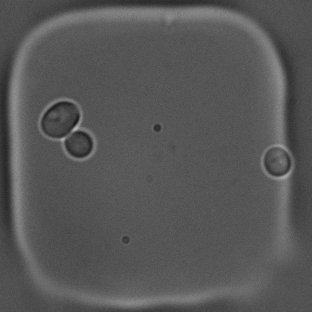

In [36]:
Image.fromarray(im2_cropped, 'RGB')

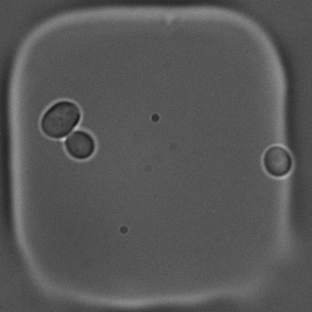

In [37]:
file3 = 'whi5-myo1-20120608T003XY01C1.tif'
im3 = cv2.imread('tif/'+file3)
shift, error, diffphase = register_translation(im2, im3)

y = (int) (y-shift[0])
x = (int) (x-shift[1])

im3_cropped = im3[y:y+h, x:x+w]
Image.fromarray(im3_cropped)

In [41]:
filename_format = 'whi5-myo1-20120608%sXY01C1.tif'

In [44]:
filename_format % 'T001'

'whi5-myo1-20120608T001XY01C1.tif'

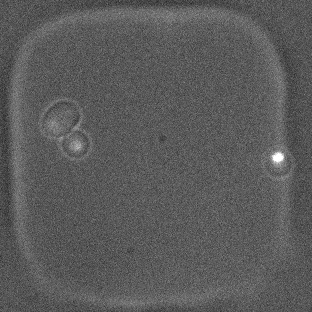

In [28]:
testC1 = cv2.imread('tif-cropped/whi5-myo1-20120608T001XY01C1.tif')
testC2 = cv2.imread('tif-cropped/whi5-myo1-20120608T001XY01C2.tif')

Image.fromarray(cv2.addWeighted(testC1, 0.5, testC2, 1, 0))
#testImg = Image.blend(testC1, testC2, 0.5)


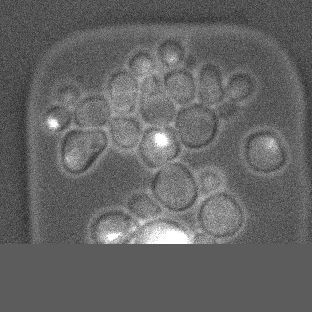

In [30]:
testC1 = cv2.imread('tif-cropped/whi5-myo1-20120608T241XY01C1.tif')
testC2 = cv2.imread('tif-cropped/whi5-myo1-20120608T241XY01C2.tif')

Image.fromarray(cv2.addWeighted(testC1, 0.5, testC2, 1, 0))
#testImg = Image.blend(testC1, testC2, 0.5)


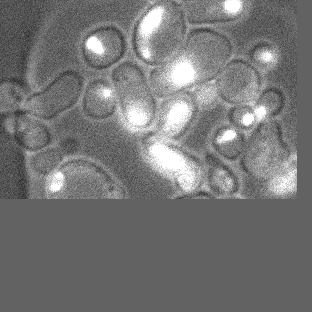

In [36]:
testC1 = cv2.imread('tif-cropped/whi5-myo1-20120608T241XY09C1.tif')
testC2 = cv2.imread('tif-cropped/whi5-myo1-20120608T241XY09C2.tif')

Image.fromarray(cv2.addWeighted(testC1, 0.5, testC2, 1, 0))
#testImg = Image.blend(testC1, testC2, 0.5)


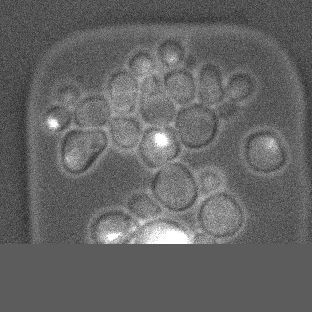

In [29]:
testC1 = cv2.imread('tif-cropped/whi5-myo1-20120608T241XY01C1.tif')
testC2 = cv2.imread('tif-cropped/whi5-myo1-20120608T241XY01C2.tif')

Image.fromarray(cv2.addWeighted(testC1, 0.5, testC2, 1, 0))
#testImg = Image.blend(testC1, testC2, 0.5)
